In [1]:
import sympy
import math 
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# $\Lambda CDM$  MODEL 

### In the $\Lambda$ CDM model the Friedmann par_ameter is given by 
$$
H^2= H_0^2 \left( \Omega_m (1+z)^3 + \Omega_r(1+z)^4 + \Omega_{de} \right)
$$

###  In this model the differential expression for each density parameter is given by 
$$
\Omega_{i}' = 3 \left( \Pi - \gamma_i \right) \Omega_i,  
$$ 
### where $\Pi = \sum \gamma_i \Omega_i$ and $' = ln(a)$. 

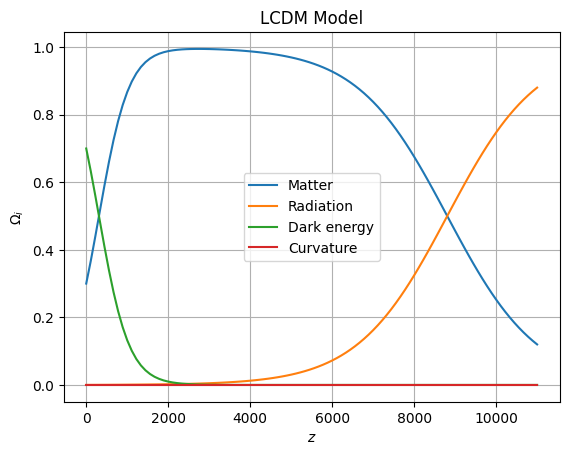

In [2]:
#Variables 
eta = np.linspace(0, -10, 100) #eta = ln(a)


#Gamma for each component \gamma = 1 + w 
Gl = 0 #LCDM
Gm, Gr, Gk = 1, 4/3, 2/3

#Initial conditions
Om0 = 0.3
Or0 = 0.0001
Ok0 = 0
Ol0 = 1 - Om0 - Or0 - Ok0


#Solution
def odes(x, eta):
  # for each component  
    Om,Or,Ol,Ok = x[0], x[1], x[2],x[3]

   # LCDM modols

    ode_m = 3*((Gm*Om+Gr*Or+Gl*Ol+Gk*Ok)-Gm)*Om
    ode_r = 3*((Gm*Om+Gr*Or+Gl*Ol+Gk*Ok)-Gr)*Or
    ode_l = 3*((Gm*Om+Gr*Or+Gl*Ol+Gk*Ok)-Gl)*Ol
    ode_k = 3*((Gm*Om+Gr*Or+Gl*Ol+Gk*Ok)-Gk)*Ok
    

    return [ode_m, ode_r, ode_l, ode_k]

# Initial conditions 
x0 = [Om0, Or0, Ol0, Ok0]
x_lcdm = odeint(odes,x0,eta)

Om_lcdm = x_lcdm[:,0]
Or_lcdm = x_lcdm[:,1]
Ol_lcdm= x_lcdm[:,2]
Ok_lcdm = x_lcdm[:,3]

z =np.linspace(0, 11000, 100)

#Ploteado densidades
plt.plot(z,x_lcdm[:,0],label='Matter')
plt.plot(z,x_lcdm[:,1],label='Radiation')
plt.plot(z,x_lcdm[:,2],label='Dark energy')
plt.plot(z,x_lcdm[:,3],label='Curvature')
plt.ylabel('$\\Omega_i$')
plt.xlabel('$z$')
plt.legend(loc='best')
plt.title("LCDM Model")
plt.grid()
plt.show()

## Interacting $\Lambda CDM$ Model 
#### Now using the effective EoS
$$
\omega_{eff,dm} = - \frac{Q}{3 H \rho_{dm}}  
$$
$$
\omega_{eff,de} = \omega_{\Lambda} + \frac{Q}{3 H \rho_{de}}
$$
#### Note that in this case the modified gamma factors with the interaction $Q = 3 b^2 H \rho_c$ are 
$$
\gamma_{eff,\Lambda} = 1 + \omega_{eff,\Lambda} =  \frac{Q}{3 H \rho_{de}} = \frac{ b^2  }{ \Omega_{\Lambda}}
$$
$$
\gamma_{eff,dm} = 1 + \omega_{eff,dm} = 1 - \frac{Q}{3 H \rho_{dm}} = 1 - \frac{ b^2}{\Omega_{dm}}
$$

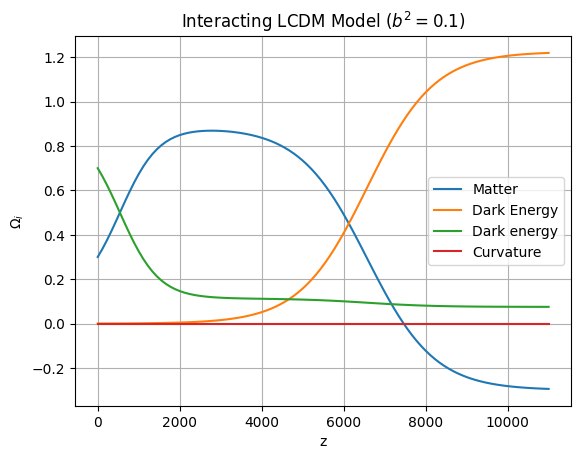

In [3]:
b2_lcdm = 0.1  # b^2 interaction coefficient


# Solution
def odes_ilcdm(x, eta):
    # for each component
    O_m, Or, Ol, O_k = x
    Gm_eff = 1 - b2_lcdm/O_m
    Gl_eff = b2_lcdm/Ol
    # ILCDM models
    ode_m  = 3 * (O_m * Gm_eff + Or * Gr + O_k * Gk + Ol * Gl_eff - Gm_eff) * O_m
    ode_r  = 3 * (O_m * Gm_eff + Or * Gr + O_k * Gk + Ol * Gl_eff - Gr) * Or
    ode_il = 3 * (O_m * Gm_eff + Or * Gr + O_k * Gk + Ol * Gl_eff - Gl_eff) * Ol
    ode_k  = 3 * (O_m * Gm_eff + Or * Gr + O_k * Gk + Ol * Gl_eff - Gk) * O_k

    return [ode_m, ode_r, ode_il, ode_k]

x0_ide = [Om0, Or0, Ol0, Ok0]
x_sol_ide = odeint(odes_ilcdm, x0_ide, eta)
Ol_ilcdm = x_sol_ide[:,2]
#Ploteado densidades
plt.plot(z,x_sol_ide[:,0],label='Matter')
plt.plot(z,x_sol_ide[:,1],label='Dark Energy')
plt.plot(z,x_sol_ide[:,2],label='Dark energy')
plt.plot(z,x_sol_ide[:,3],label='Curvature')
plt.ylabel('$\\Omega_i$')
plt.xlabel('z')
plt.legend(loc='best')
plt.title("Interacting LCDM Model ($b^2 = 0.1$)")
plt.grid()





## Holographic Dark Energy Model (HDE)
### In the holographic dark energy model the Friedmann parameter is given by 
$$
H^2= H_0^2 \left( \Omega_m (1+z)^3 + \Omega_r(1+z)^4 + \Omega_{de}^{-2 +2/c} \right)
$$
### where $c$ is a free parameter. The EoS assoicated is 
$$
\omega_{hde} = -\frac{1}{3} - \frac{2\sqrt{\Omega_{de}}}{3c}
$$

## Interacting Holographic Dark Energy Model (IHDE)
### For the holographic dark energy model with the dark matter interaction, the evolution of the 
### the density parameter is given by 
$$
\frac{d \Omega_{de}}{dz} = \frac{\Omega_{de}(\Omega_{de} -1) }{z+1} \left(1 + \frac{2 \sqrt{\Omega_{de}}}{c} \right) + \frac{Q \Omega_{de}}{(1+z)H\rho_c} - \frac{3 \Omega_{de} \Omega_{eff} \omega_{eff}}{z+1} \,
$$

### for an universe dominated by dark matter and dark energy, the Friedmann constraint is just $\Omega_{de} + \Omega_{d}=1$ 
### and $\Omega_{eff}=0$. Also, if we consider the interaction in the form $Q = 3 b^2 H \rho_c$. The last equation takes the form 
$$
\frac{d \Omega_{de}}{dz} = \frac{\Omega_{de}(\Omega_{de} -1) }{z+1} \left(1 + \frac{2 \sqrt{\Omega_{de}}}{c} \right) + \frac{3 b^2 \Omega_{de}}{1+z} \,
$$

In [4]:
# Different values for c 
c = [0.4,1.0, 0.8, 1.5, 2.1]
b2 =  0.1 # this is b^2 
b20 = 0 

''' 
We solve the equation using the odeint method and the differents values of b^2 and c.
Define the equations: 
'''

def modelz_1 (y,z):

    dydz = (y*(y-1)/(z+1))*((2*(np.sqrt(y)))/c[0] + 1) + (3*y*b2)/(z+1) # using c = 0.4 

    return dydz



def modelz_2(y,z):

    dydz = (y*(y-1)/(z+1))*((2*(np.sqrt(y)))/c[1] + 1) + (3*y*b2)/(z+1) # using c = 1.0

    return dydz

def modelz_3 (y,z):

    dydz = (y*(y-1)/(z+1))*((2*(np.sqrt(y)))/c[2] + 1) + (3*y*b2)/(z+1) # using c = 0.8

    return dydz

def modelz_4(y,z):

    dydz = (y*(y-1)/(z+1))*((2*(np.sqrt(y)))/c[3] + 1) + (3*y*b2)/(z+1) # using c = 1.5

    return dydz

def modelz_5 (y,z):

    dydz = (y*(y-1)/(z+1))*((2*(np.sqrt(y)))/c[4] + 1) + (3*y*b2)/(z+1) # using c = 2.1

    return dydz


'''
This model is just holographic without interaction (b = 0 )
'''


def modelz_6 (y,z):

    dydz = (y*(y-1)/(z+1))*((2*(np.sqrt(y)))/1.0 + 1) #+  using c = 0.8

    return dydz



In [5]:

def modelz_6 (y,z):

    dydz = (y*(y-1)/(z+1))*((2*(np.sqrt(y)))/1.0 + 1) #+  using c = 0.8

    return dydz


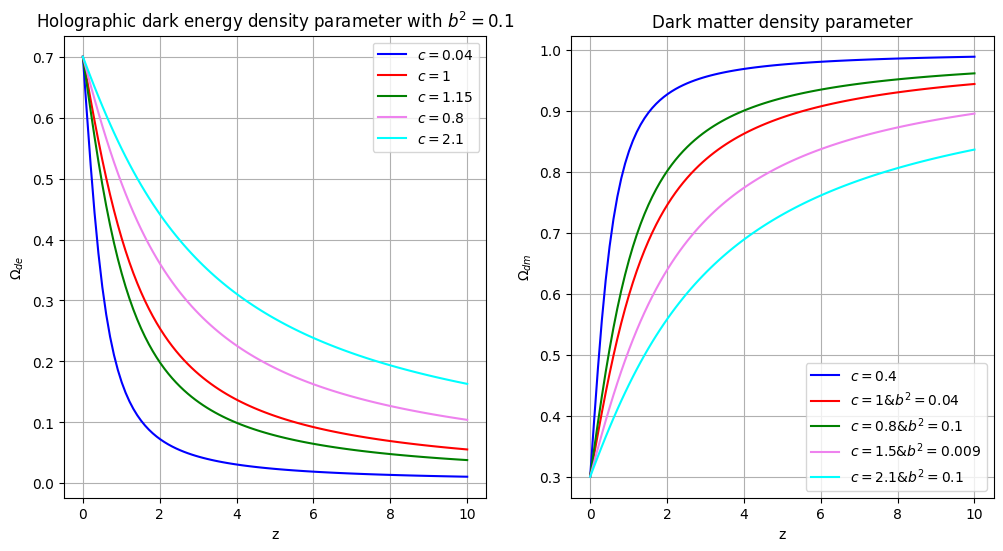

In [6]:
# Define the initial condition
y0 = 0.7
# Define the redshift interval 
z = np.linspace(0,10,100)


# the solutions for each equation 
solutions = [odeint(modelz_1,y0,z) ,odeint(modelz_2,y0,z),odeint(modelz_3,y0,z),odeint(modelz_4,y0,z),odeint(modelz_5,y0,z),odeint(modelz_6,y0,z)] 

Ol_hde  = solutions[5]
Ol_ihde = solutions[2]
# Using the Friedmann condition to calculate the dark matter evolution 

O_dm = [1-solutions[0],1-solutions[1],1-solutions[2],1-solutions[3],1-solutions[4]]

''' 
The plots for the solutions are the following 
'''

# dark energy parameter density 
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(z,solutions[0],color='blue',label='$c=0.04$')
plt.plot(z,solutions[1],color='red',label='$c=1$')
plt.plot(z,solutions[2],color='green',label='$c=1.15$')
plt.plot(z,solutions[3],color='violet',label='$c=0.8$')
plt.plot(z,solutions[4],color='cyan',label='$c=2.1$')
plt.xlabel('z')
plt.legend()
plt.title('Holographic dark energy density parameter with $b^2 = 0.1$')
plt.ylabel('$\Omega_{de}$')
plt.grid()


#dark matter paramter density 
plt.subplot(1, 2, 2)
plt.plot(z,O_dm[0],color='blue',label='$c=0.4$')
plt.plot(z,O_dm[1],color='red',label='$c=1 & b^2 =0.04$')
plt.plot(z,O_dm[2],color='green',label='$c=0.8 & b^2 =0.1$')
plt.plot(z,O_dm[3],color='violet',label='$c=1.5 & b^2 =0.009$')
plt.plot(z,O_dm[4],color='cyan',label='$c=2.1 & b^2 =0.1$')
plt.xlabel('z')
plt.legend()
plt.title('Dark matter density parameter')
plt.ylabel('$\Omega_{dm}$')
plt.grid()



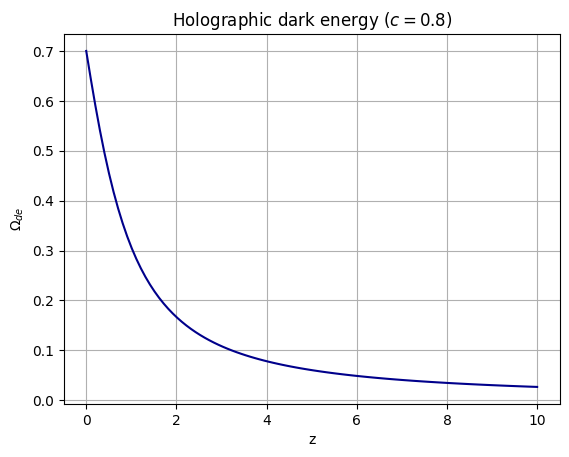

In [7]:
plt.plot(z,Ol_hde,color='darkblue')
plt.title('Holographic dark energy ($c=0.8$)')
plt.xlabel('z')
plt.ylabel('$\Omega_{de}$')
plt.grid()

###  The general equation for the EoS parameter  
$$
 \omega_{de}= -\frac{1}{3}\left\{1+\frac{2\sqrt{\Omega_{de}}}{c}\right\}-\frac{Q}{3H\rho_{de}} +\frac{2\omega_{eff}\Omega_{eff}}{3(1-\Omega_{de})} 
$$


### Using the interection previously defined and $\Omega_{eff} = 0$ is
$$
\omega_{de}= -\frac{1}{3}\left( 1 + 2\frac{\sqrt{\Omega_{de}}}{c}\right) - \frac{b^2}{\Omega_{de}}
$$


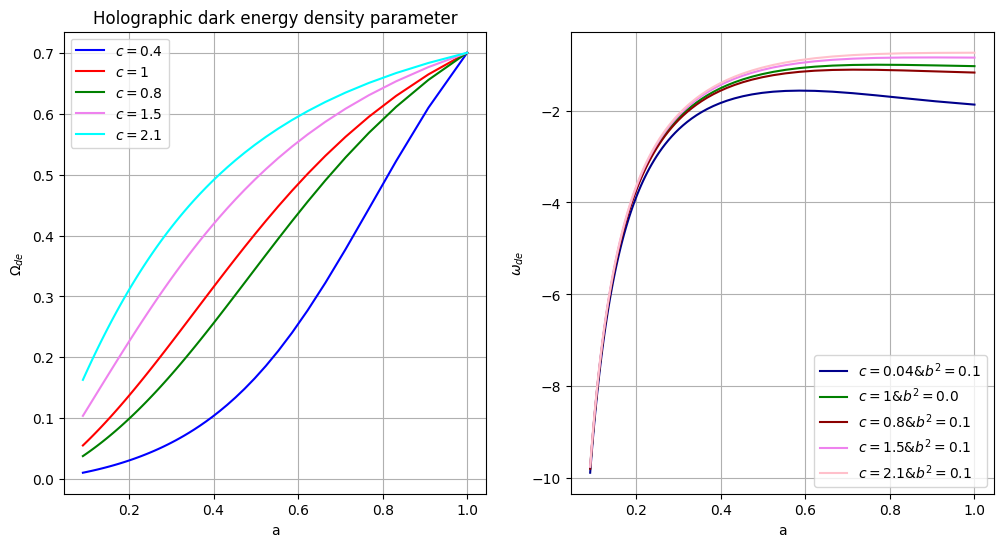

In [8]:

# The plots on the scalar factor are
a=1./(1+z)



# dark energy density parameter 
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(a,solutions[0],color='blue',label='$c=0.4$')
plt.plot(a,solutions[1],color='red',label='$c=1 $')
plt.plot(a,solutions[2],color='green',label='$c=0.8$')
plt.plot(a,solutions[3],color='violet',label='$c=1.5$')
plt.plot(a,solutions[4],color='cyan',label='$c=2.1$')
plt.xlabel('a')
plt.legend()
plt.title('Holographic dark energy density parameter')
plt.ylabel('$\Omega_{de}$')
plt.grid()


plt.subplot(1, 2, 2)
# Define the EoS parameter using the solutions 
eos = []
for i in solutions: # these are the solutions for DE 
    for j in c:    # these are the c values 
        omega = -(1/3)*(1+ (2*np.sqrt(i))/(j)) - b2/i
        eos.append(omega)
        
plt.plot(a,eos[0],color='darkblue',label='$c=0.04 & b^2 =0.1$')
plt.plot(a,eos[1],color='green',label='$c=1 & b^2 =0.0$')
plt.plot(a,eos[2],color='darkred',label='$c=0.8 & b^2 =0.1$')
plt.plot(a,eos[3],color='violet',label='$c=1.5 & b^2 =0.1$')
plt.plot(a,eos[4],color='pink',label='$c=2.1 & b^2 =0.1$')
plt.legend()
plt.ylabel('$\omega_{de}$')
plt.xlabel("a")
plt.grid()
plt.savefig("Omegas_a.png")


In [9]:
''' 
EoS without interaction (b = 0)
'''

eos_holog = -(1/3)*(1+ (2*np.sqrt(Ol_hde))/(c[2]))





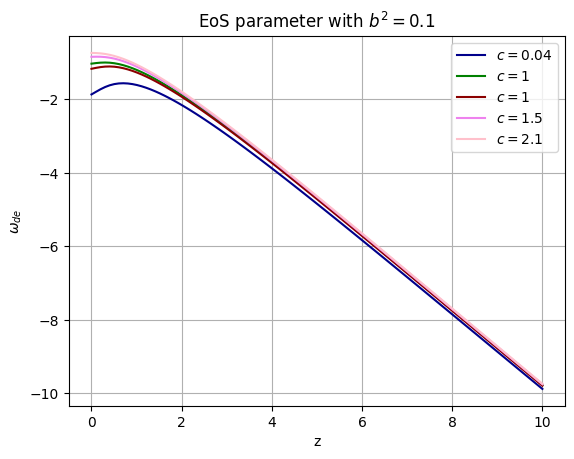

In [10]:

# on redshif 
eos_z = []
for j in c:
    for i in solutions:
        omega_z = -(1/3)*(1+ (2*np.sqrt(i))/(j)) - b2/i
        eos_z.append(omega_z)


# without interaction 
eos_hde = []
for j in c:
    for i in solutions:
        omega_z = -(1/3)*(1+ (2*np.sqrt(i))/(j)) 
        eos_z.append(omega_z)

            


plt.plot(z,eos[0],color='darkblue',label='$c=0.04$')
plt.plot(z,eos[1],color='green',label='$c=1$')
plt.plot(z,eos[2],color='darkred',label='$c=1$')
plt.plot(z,eos[3],color='violet',label='$c=1.5$')
plt.plot(z,eos[4],color='pink',label='$c=2.1$')
plt.title('EoS parameter with $b^2 =0.1$')
plt.legend()
plt.ylabel('$\omega_{de}$')
plt.xlabel("z")
plt.grid()



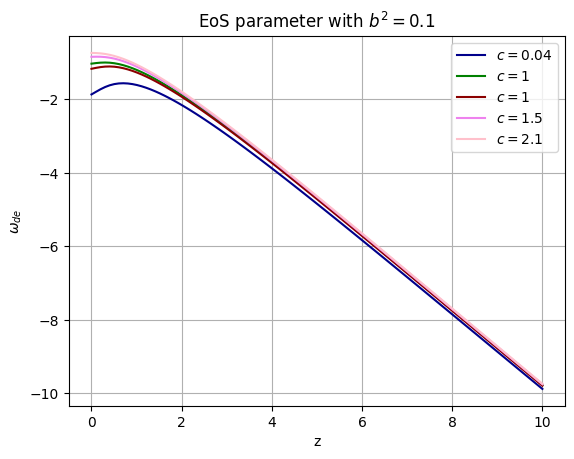

In [11]:
# without interaction 
eos_hde = []
for j in c:
    for i in solutions:
        omega_z = -(1/3)*(1+ (2*np.sqrt(i))/(j)) 
        eos_z.append(omega_z)


plt.plot(z,eos[0],color='darkblue',label='$c=0.04$')
plt.plot(z,eos[1],color='green',label='$c=1$')
plt.plot(z,eos[2],color='darkred',label='$c=1$')
plt.plot(z,eos[3],color='violet',label='$c=1.5$')
plt.plot(z,eos[4],color='pink',label='$c=2.1$')
plt.title('EoS parameter with $b^2 =0.1$')
plt.legend()
plt.ylabel('$\omega_{de}$')
plt.xlabel("z")
plt.grid()

## Comparation between different models

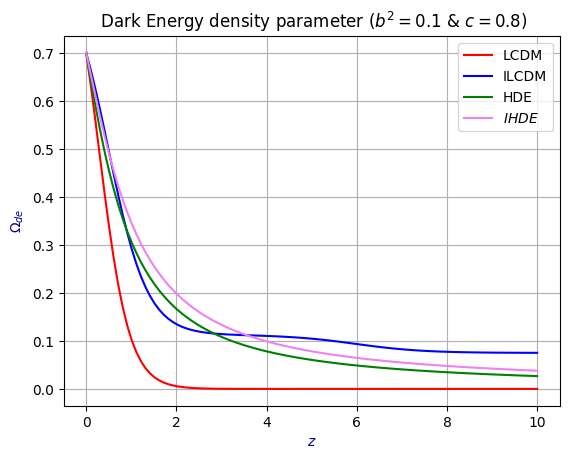

In [12]:

plt.plot(z,Ol_lcdm,color='red', label='LCDM') # LCDM
plt.plot(z,Ol_ilcdm,color='blue', label='ILCDM') # Interacting LCDM 
plt.plot(z,Ol_hde,color='green', label='HDE') # HDE
plt.plot(z,Ol_ihde,color='violet',label='$IHDE$') # IHDE
plt.xlabel('$z$', color='darkblue')
plt.ylabel('$\Omega_{de}$', color='darkblue')
plt.title(' Dark Energy density parameter ($b^2 = 0.1$ & $c = 0.8$)')
plt.legend()
plt.grid()

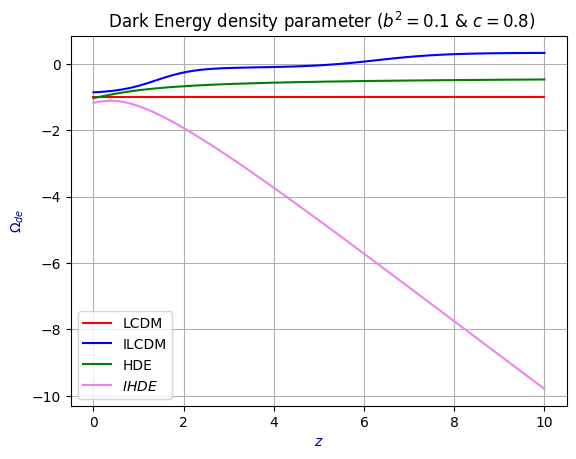

In [13]:
# Eos for each model 
omega_lcdm = np.full(100,-1)
omega_ilcdm = -1 + b2_lcdm/Ol_ilcdm
omega_ihde = eos[2]



plt.plot(z,omega_lcdm,color='red', label='LCDM') # LCDM
plt.plot(z,omega_ilcdm,color='blue', label='ILCDM') # Interacting LCDM 
plt.plot(z,eos_holog,color='green', label='HDE') # HDE
plt.plot(z,omega_ihde,color='violet',label='$IHDE$') # IHDE
plt.xlabel('$z$', color='darkblue')
plt.ylabel('$\Omega_{de}$', color='darkblue')
plt.title(' Dark Energy density parameter ($b^2 = 0.1$ & $c = 0.8$)')
plt.legend()
plt.grid()

In [14]:
arr_hub = np.loadtxt('Hz_all.dat')
z_obs= arr_hub[:,0]
hub_obs = arr_hub[:,1]
error_obs = arr_hub[:,2]



$$
H(z) = H_0 
$$

In [15]:
c = [0.5, 0.6, 0.75, 1.0,2]
z_rs = np.linspace(0,2.5, 100)
O_de0 = 0.7

def modelz_1(Omega, z,c_value):
    dOdz = -(Omega*(1-Omega)/(1+z))*(1 + 2*np.sqrt(Omega)/c_value) - Omega*0.0001*(z+1)**3
    return dOdz


solution_hde = []
for c_value in c:
    sol = odeint(modelz_1, O_de0, z_rs, args=(c_value,))
    solution_hde.append(sol)


Ode = [solution_hde[0].reshape(-1),solution_hde[1].reshape(-1), solution_hde[2].reshape(-1), solution_hde[3].reshape(-1),solution_hde[4].reshape(-1),]


# Define the parameters
Om = 0.3
Or = 0.0001
Ok = 0.0
Oe = 1 - Om - Or - Ok
H0 = 70

def RHSquared_z(z, sol_ode):
    return H0*np.sqrt((Or*(z + 1)**4 + Om*(z + 1)**3)/(1 - sol_ode))

Hubble_z = []
for sol_ode in Ode:
    Hub = RHSquared_z(z_rs, sol_ode)
    Hubble_z.append(Hub)

    
hub1 = Hubble_z[0]
hub2 = Hubble_z[1]
hub3 = Hubble_z[2]
hub4 = Hubble_z[3]
hub5 = Hubble_z[4]

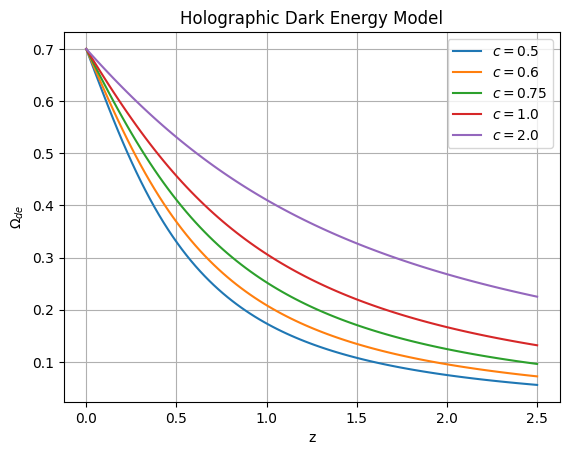

In [16]:
c = [0.5, 0.6, 0.75, 1.0,2]
plt.plot(z_rs, Ode[0], label='$c = 0.5$')
plt.plot(z_rs, Ode[1], label='$c = 0.6$')
plt.plot(z_rs, Ode[2], label='$c = 0.75$')
plt.plot(z_rs, Ode[3], label='$c =1.0$')
plt.plot(z_rs, Ode[4], label='$c =2.0$')
plt.xlabel('z')
plt.ylabel('$\Omega_{de}$')
plt.title('Holographic Dark Energy Model')
plt.legend()
plt.grid()

In [17]:
def hub(z, Ok=0):
    Om= 0.3
    Or= 0.0001
    #Ok=0.01
    Oe= 1 - Om - Or - Ok
    H0 = 70
    
    return H0*np.sqrt( Or*(1+z)**4 + Om*(1+z)**3 + Ok*(1+z)**2 + Oe)

red_z = np.linspace(0, 2, 100)

hubz = hub(red_z)

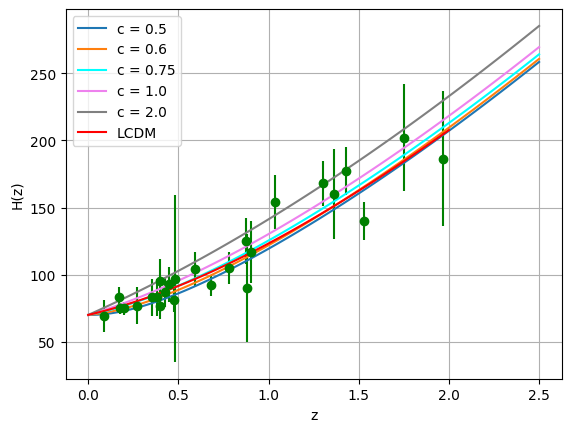

In [18]:
c = [0.5, 0.6, 0.75, 1.0,2]

plt.errorbar(z_obs, hub_obs, error_obs, ls='', marker='o',color='green')
plt.plot(z_rs,hub1, label='c = 0.5')
plt.plot(z_rs,hub2, label='c = 0.6')
plt.plot(z_rs,hub3, label='c = 0.75', color='cyan')
plt.plot(z_rs,hub4, label='c = 1.0', color='violet')
plt.plot(z_rs,hub5, label='c = 2.0',color='gray')
#plt.plot(z_n,hub5, label='c = -0.8')
#plt.plot(z_n,hub6, label='c = 0.9')
#plt.plot(z_n,hub7, label='c = -0.8')
#plt.plot(z_n,hub8, label='c = 0.9')
plt.plot(red_z,hubz, label='LCDM',color='red')
plt.ylabel('H(z)')
plt.xlabel('z')
#plt.plot(redz, hubzc, label='GGC')
plt.legend()
plt.grid()

 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 = -0.1301307435475D-01   r2 =                  NaN


/tmp/ipykernel_376750/1266038285.py:9: RuntimeWarning: invalid value encountered in power
  dOmega =  Omega*(1 - Omega)*((np.sqrt(Omega)/c)*(((Q*(1-Omega)/Omega))**((f-1)/(2*(f-2))))*(-2*f) + 2*f - 1 + np.log(Q*(1-Omega)/Omega)**(f_prim/(f -2)))
/usr/lib/python3/dist-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


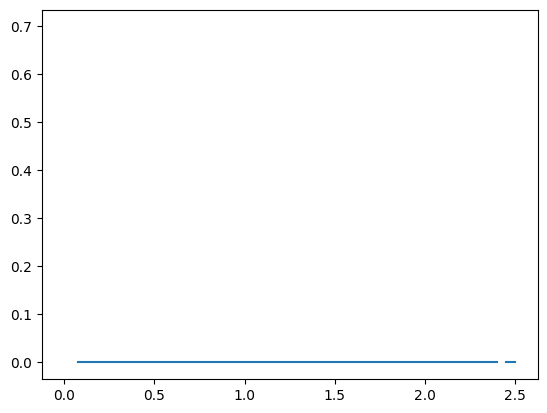

In [19]:
H0 = 70 
Om0 = 0.3
xval_g = np.linspace(0.001,np.log(1./(1+3)),100)
def func_g (Omega,x,b=1,c=1):
    # f(x) = 2 + b*x
    f = 2 + np.exp(-x)
    f_prim = -np.exp(-x)*(np.exp(-x)-1) 
    Q = (c**2)*(np.exp(3*x))/(H0**2)*(Om0)
    dOmega =  Omega*(1 - Omega)*((np.sqrt(Omega)/c)*(((Q*(1-Omega)/Omega))**((f-1)/(2*(f-2))))*(-2*f) + 2*f - 1 + np.log(Q*(1-Omega)/Omega)**(f_prim/(f -2)))
    return dOmega



sol_g = odeint(func_g,O_de0,xval_g)

sol_g_re = sol_g.reshape(-1)

plt.plot(z_rs,sol_g_re)


In [21]:
def fun_g_z(Omega,z,c=0.7):
    #Q = c**2/((H0**2)*Om0)
    dOmega = (Omega*(Omega-1)/(z+1))*((2*(np.sqrt(Omega)))/c + 1)
    return Omega 

Ode0 = 0.7
sol_g_z = odeint(fun_g_z,Ode0,z_rs)
sol_g_z[-1]

array([8.52774619])